In [1]:
# !pip install Sastrawi

# Import Library

In [2]:
import os, pickle, re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk, string 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk.probability import FreqDist
from random import shuffle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

from nltk.classify import NaiveBayesClassifier
from nltk.metrics import precision, recall, f_measure
from nltk.classify.util import accuracy

from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Stop word & Stemmer

In [3]:
stop_words = set(stopwords.words('indonesian'))
stemmer = StemmerFactory().create_stemmer()

# Load Dataset

In [4]:
DATA_PATH = './dataset.csv'
df = pd.read_csv(DATA_PATH)
df.head()

,score,text,class
0,8,rt benar yang justru dikuatirkan adalah selama...,Positive
1,0,rt sejumlah orang yang nama diri bagai aktivis...,Neutral
2,8,rt benar yang justru dikuatirkan adalah selama...,Positive
3,-4,rt tentang prabowo subianto indonesia bisa bub...,Negative
4,3,rt indonesian presidential election map by reg...,Positive


# Preprocessing

In [5]:
def preprocessing(document):
    words = word_tokenize(document.lower())
    words = [stemmer.stem(word) for word in words]
    words = [word for word in words if word.isalpha()]
    return {word : True for word in words if word not in string.punctuation and word not in stop_words}

In [6]:
feature_sets = [(preprocessing(text), cls) for text, cls in zip(df['text'].apply(str), df['class'].apply(str))]

shuffle(feature_sets)

# Exploratory data analysis - EDA

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'Banks'}, xlabel='count'>

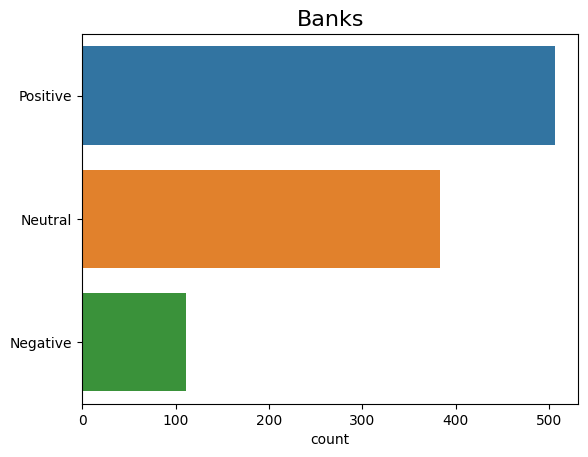

In [7]:
count = df['class'].value_counts()
labels = list(df['class'].value_counts().index)
plt.title('Banks', fontsize = 16)
sns.barplot(x=count, y=labels, data=df)

In [8]:
# Separate words for each class
negatif_words = [word for features, cls in feature_sets if cls == 'Negative' for word in features.keys()]
neutral_words = [word for features, cls in feature_sets if cls == 'Neutral' for word in features.keys()]
positif_words = [word for features, cls in feature_sets if cls == 'Positive' for word in features.keys()]

# Create word clouds for each class
def create_word_cloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

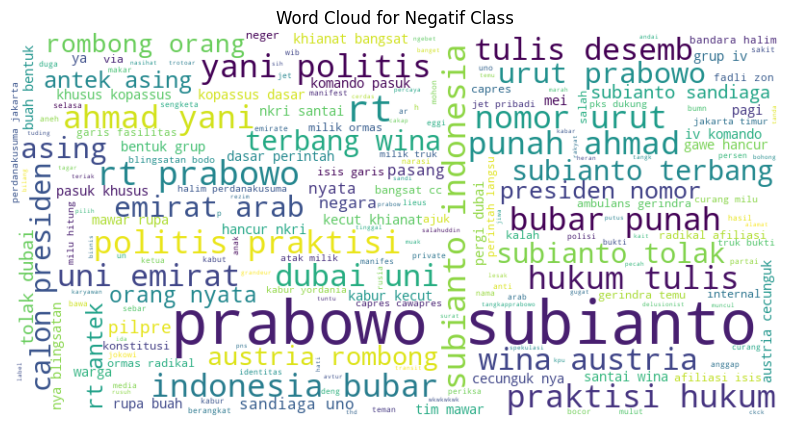

In [9]:
create_word_cloud(negatif_words, 'Word Cloud for Negatif Class')

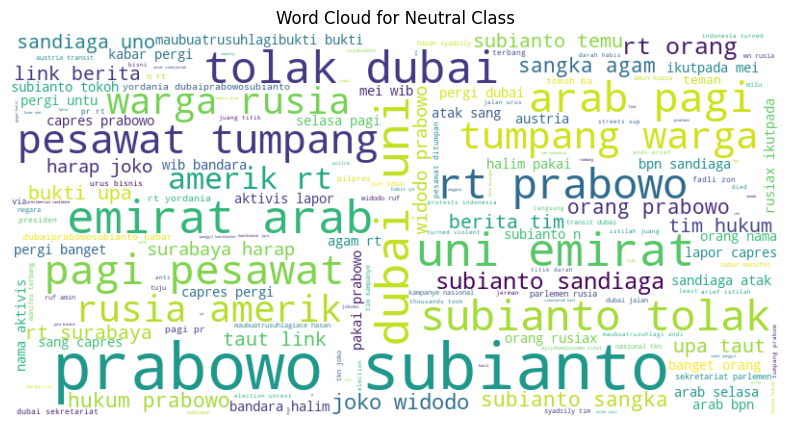

In [10]:
create_word_cloud(neutral_words, 'Word Cloud for Neutral Class')

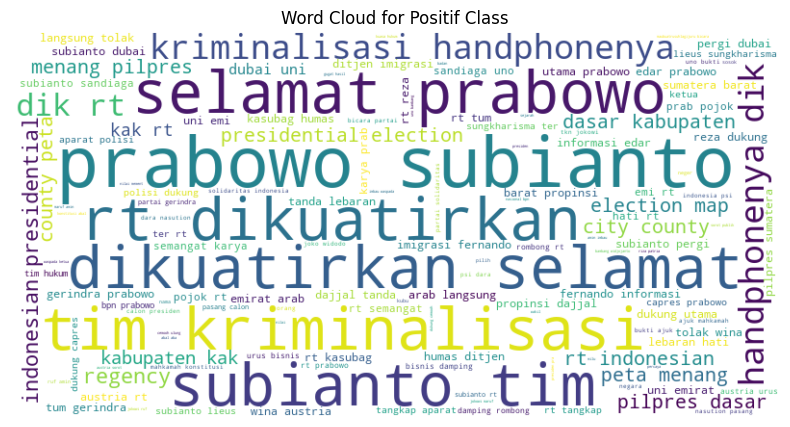

In [11]:
create_word_cloud(positif_words, 'Word Cloud for Positif Class')

# TF-IDF

In [12]:
# Extract features and labels from the data
features = [doc[0] for doc in df]
labels = [doc[1] for doc in df]

# Initialize DictVectorizer to convert features to text format
dict_vectorizer = DictVectorizer(sparse=False)
features_text = dict_vectorizer.fit_transform(features)

# Convert features_text to list of strings (documents)
documents = [' '.join(map(str, row)) for row in features_text]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Compute TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print TF-IDF matrix and feature names
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\nFeature Names:")
print(feature_names)

AttributeError: 'str' object has no attribute 'items'

# Split Data

In [ ]:
col = ['text_preprocessed', 'class']

index_len = int(len(feature_sets) * 0.8)

train_data, test_data = feature_sets[:index_len], feature_sets[index_len:]

# Model Training

**Naive Bayes Model**

In [ ]:

naive_classifier = NaiveBayesClassifier.train(train_data)

accuracy_score = accuracy(naive_classifier, test_data)

true_labels = [label for features, label in test_data]
predicted_labels = [naive_classifier.classify(features) for features, label in test_data]

true_set = set(true_labels)
predicted_set = set(predicted_labels)

precision_score = precision(true_set, predicted_set)
recall_score = recall(true_set, predicted_set)
f1_score = f_measure(true_set, predicted_set)

print("Accuracy:", accuracy_score)
print("Precision:", precision_score)
print("Recall:", recall_score)
print("F1 Score:", f1_score)

Accuracy: 0.895
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
svm_classifier = SklearnClassifier(SVC(kernel='linear'))

svm_classifier.train(train_data)

true_labels = [label for features, label in test_data]
predicted_labels = [svm_classifier.classify(features) for features, label in test_data]

accuracy_score = accuracy_score(true_labels, predicted_labels)
precision_score = precision_score(true_labels, predicted_labels, average='macro')
recall_score = recall_score(true_labels, predicted_labels, average='macro')
f1_score = f1_score(true_labels, predicted_labels, average='macro')

print("Accuracy:", accuracy_score)
print("Precision:", precision_score)
print("Recall:", recall_score)
print("F1 Score:", f1_score)


Accuracy: 0.925
Precision: 0.9194152046783626
Recall: 0.9059619574325456
F1 Score: 0.9119668183034518
